In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import file_utility as FU
import vicsek_model_lib as VM_lib

# Part 1

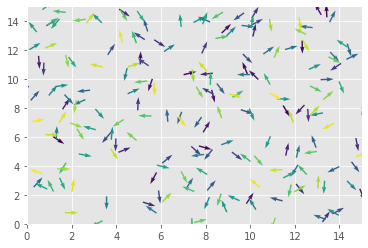

In [2]:
L = 15
N = 200
state = VM_lib.initialize(L,N)
plt.figure()
plt.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(len(state))) 
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

# Part 2

In [3]:
A = VM_lib.cal_pdist(state[:,:2],L)
print(A)

[[0.         5.16885931 7.23818396 ... 1.42264138 2.59277585 6.09327457]
 [5.16885931 0.         4.94154494 ... 3.89134993 6.30057957 1.04945107]
 [7.23818396 4.94154494 0.         ... 7.54057144 9.31101513 4.06626932]
 ...
 [1.42264138 3.89134993 7.54057144 ... 0.         3.61538175 4.75398438]
 [2.59277585 6.30057957 9.31101513 ... 3.61538175 0.         7.34271862]
 [6.09327457 1.04945107 4.06626932 ... 4.75398438 7.34271862 0.        ]]


# Part 3

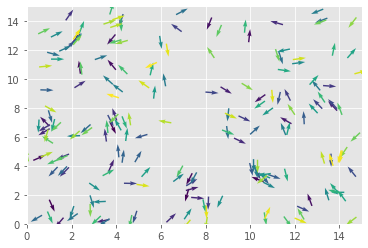

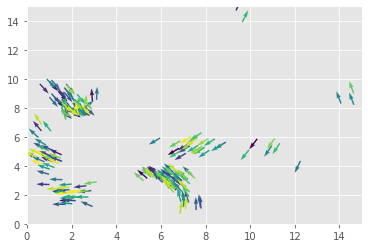

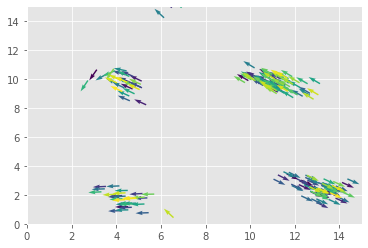

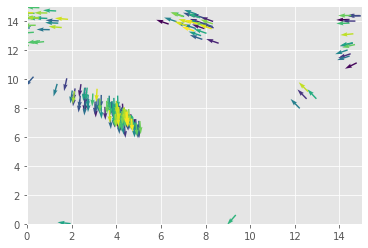

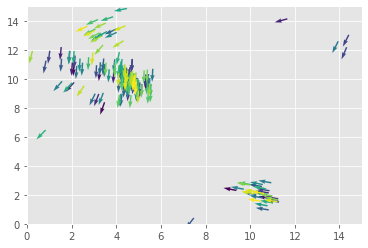

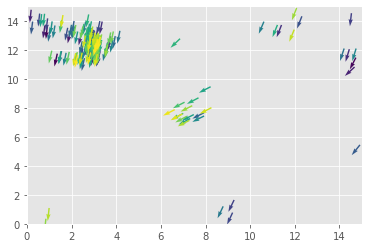

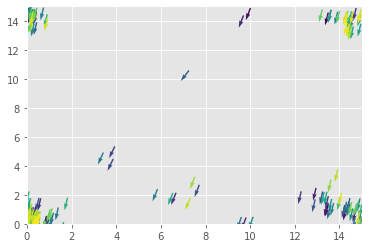

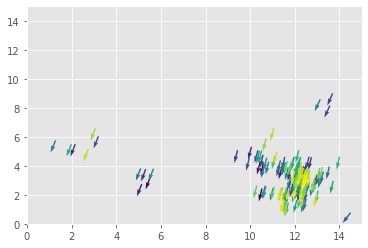

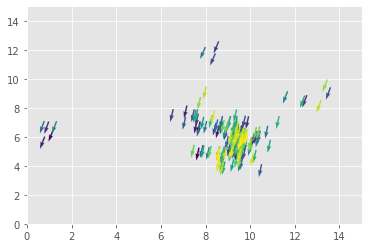

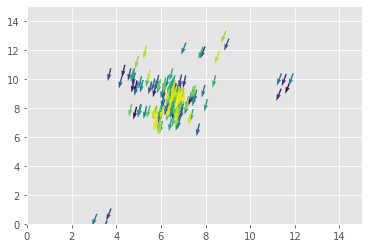

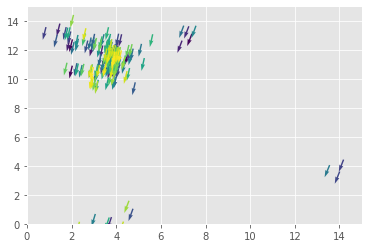

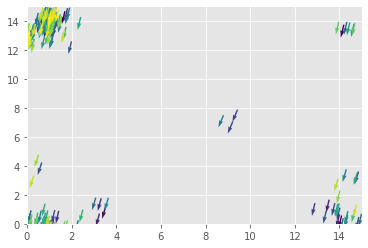

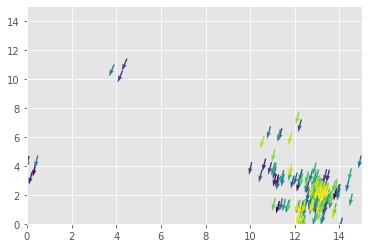

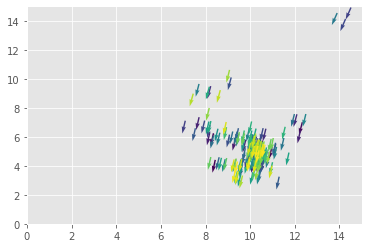

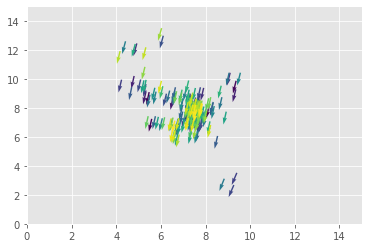

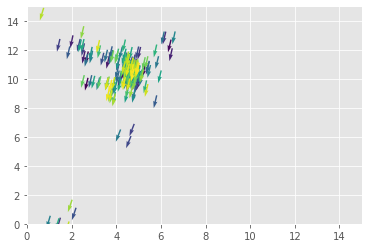

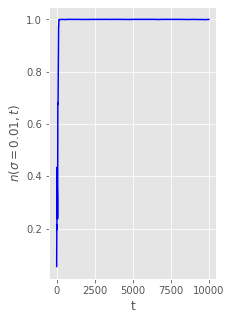

In [5]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
sigma = 0.01  # std of noise
T = 10000  # total time steps
opara = np.zeros(T) # the Vicsek order parameter
fig_time = np.arange(0,400,25)

state = VM_lib.initialize(L,N)
for t in range(T):
    state,opara[t] = VM_lib.update_wop(state, L, v0, R, sigma)
    #representative plots
    if t in fig_time:
        plt.figure()
        plt.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        plt.xlim(0,15)
        plt.ylim(0,15)
        plt.show()

plt.figure(figsize=(3,5))
plt.plot(np.arange(T),opara,'b')   
plt.xlabel('t')
plt.ylabel(r'$n(\sigma=0.01,t)$')
plt.show()

# Part 4

In [8]:
def visualize_simulation(N,L,v0,R,T,sigma,video_fps):
    """Make movies of the flocking simulation with different values of sigma.
    
    Parameters
    ----------
    N: int
        Number of individual birds
    L: float
        Size of the container(L*L)
    v0: float
        The constant velocity of the brids per time step
    R: float
        Radius within which for preys to search for neighbours
    T: int
        The total time steps of the simulation
    sigma: float
        Standard deviation of noise
    video_fps: int
        Frames per second of the video
    """
    # create folder to store the generated videos
    video_path = './Q4/Videos/'
    FU.createFolder(video_path)
    # create folder to store the generated pictures for different values of sigma
    pics_path = './Q4/VideoPics/sigma_{}/'.format(sigma)
    FU.createFolder(pics_path)

    state = VM_lib.initialize(L,N)
    for t in range(T):
        state, opara = VM_lib.update_wop(state, L, v0, R, sigma)
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.quiver(state[:,0],state[:,1],np.cos(state[:,2]),np.sin(state[:,2]),np.arange(N)) 
        ax.set_xlim(0,15)
        ax.set_ylim(0,15)
        fig.savefig(pics_path+'{}.png'.format(t))
        plt.close(fig)
    
    video_name = 'sigma_{}'.format(sigma)
    FU.makeVideo(pics_path,video_path,video_name,video_fps,T)

In [9]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
T = 1000  # total time steps
video_fps = 12  # fps of the video

## Change the value of sigma for different simulations ##
sigma = 0.01  # std of noise
visualize_simulation(N,L,v0,R,T,sigma,video_fps)

# Part 5

In [15]:
def cal_n_sigma(N,L,v0,R,T,sigma_array):
    """Save traces of the vicsek model parameter for the flocking simulation with different values of sigma in a csv file.
    
    Parameters
    ----------
    N: int
        Number of individual birds
    L: float
        Size of the container(L*L)
    v0: float
        The constant velocity of the brids per time step
    R: float
        Radius within which for preys to search for neighbours
    T: int
        The total time steps of the simulation
    sigma_array: ndarray
        Different values of standard deviation of noise term
    """
    FU.createFolder('./Q5/')
    res = np.zeros((T,len(sigma_array)))
    for j in range(len(sigma_array)):
        sigma = sigma_array[j]
        state = VM_lib.initialize(L,N)
        for t in range(T):
            state,res[t,j] = VM_lib.update_wop(state,L,v0,R,sigma)
    
    df = pd.DataFrame(data=res,index=[i+1 for i in range(res.shape[0])],columns=[str(sigma) for sigma in sigma_array])
    df.to_csv('./Q5/n_sigma.csv')

In [16]:
N = 200  # number of individual birds
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the birds per time step
R = 1 # radius within which to search for neighbours
T = 10000  # total time steps

## change the value of sigma_array ##
sigma_array = np.linspace(0,2,50)

cal_n_sigma(N,L,v0,R,T,sigma_array)

In [30]:
df = pd.read_csv('./Q5/n_sigma.csv') 
opara = df.to_numpy()[:,1:]
sigma_array = df.columns[1:].to_numpy(dtype=np.float)
t = VM_lib.burn_in(L,N,v0,R)  # we calculate the longest burn in time before the system to reach steady state
error_bar_mean = np.mean(opara[t:,:])
error_bar_std = np.std(opara[t:,:])

fig, ax = plt.subplots()
ax.errorbar(sigma_array, error_bar_mean,yerr=error_bar_std,fmt='-o')

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'error bar of $n(\sigma)$')
ax.set_title('Line plot with error bars')

plt.show()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [ ]:
for j in len(sigma_array):
    plt.figure(figsize=(3,5))
    plt.plot(np.arange(len(opara)),res[t:,j],'b')    
    plt.xlabel('time steps')
    plt.ylabel('order parameter of sigma: '+str(sigma))
    plt.ylim(0,1.1)
    plt.show()

# Part 6

In [ ]:
def visualize_simulation_pred(N,M,L,v0,v_predator,R,R_predator,R_run_away,T,sigma_prey,sigma_predator,video_fps):
    """Make movies of the flocking simulation with the existence of predators.
    
    Parameters
    ----------
    N: int
        Number of preys
    M: int
        Number of predators
    L: float
        Size of the container(L*L)
    v0: float
        The constant velocity of the preys per time step
    v_predator: float   
        The constant velocity of the preditor per time step
    R: float
        Radius within which for preys to search for neighbours
    R_predator: float
        Radius within which to catch the preys
    R_run_away: float
        Radius within which the prey spot the predator and try to run away
    T: int
        The total time steps of the simulation
    sigma_prey: float
        Standard deviation of noise of preys
    sigma_predator: float
        Standard deviation of noise of predators
    video_fps: int
        Frames per second of the video
    """
    opara = np.zeros(T) # the Vicsek order parameter
    # create folder to store the generated videos
    video_path = './Q6/Videos/'
    FU.createFolder(video_path)
    # create folder to store the generated pictures for different values of parameter
    pics_path = './Q6/VideoPics/v_predator_{}R_predator_{}/'.format(v_predator,R_predator)
    FU.createFolder(pics_path)
    prey, predator = VM_lib.initialize(L,N,M)
    for t in range(T):
        prey, predator, opara[t] = VM_lib.update_pred(prey, predator, L, v0, v_predator, R, R_predator, R_run_away, sigma_prey, sigma_predator)
        fig = plt.figure()
        ax = plt.subplot(111)
        ax.quiver(prey[:,0],prey[:,1],np.cos(prey[:,2]),np.sin(prey[:,2]),color='k') 
        ax.quiver(predator[:,0],predator[:,1],np.cos(predator[:,2]),np.sin(predator[:,2]),color='r')
        ax.set_xlim(0,15)
        ax.set_ylim(0,15)
        fig.savefig(pics_path+'{}.png'.format(t))
        plt.close(fig)

    video_name = 'v_predator_{}R_predator_{}'.format(v_predator,R_predator)
    FU.makeVideo(pics_path,video_path,video_name,video_fps,T)

In [3]:
N = 200  # number of preys
M = 3  # number of predators
L = 15   # size of the container(L*L)
v0 = 0.5  # the constant velocity of the preys per time step
v_predator = 0.7 # the constant velocity of the preditor per time step
R = 1 # radius within which to search for neighbours
R_predator = 3.5 # radius within which to catch the preys
R_run_away = 3.5 # radius within which the prey spot the predator and try to run away
sigma_prey = 0.01  # std of noise term of preys
sigma_predator = 0.01  # std of noise term of predators
T = 300  # total time steps
video_fps = 7  # fps of the video

visualize_simulation_pred(N,M,L,v0,v_predator,R,R_predator,R_run_away,T,sigma,video_fps)

